# Import Libraries

In [1]:
import pandas as pd
import missingno as mn
import difflib

# Import Data

In [2]:
# reads in data and merges them into 1 dataframe
intel = pd.read_csv('./datasets/raw_data/dog_intelligence.csv')
info = pd.read_csv('./datasets/raw_data/akc_breed_info.csv', encoding="ISO-8859-1")

# Inspect Data

In [3]:
intel.head(2)

,Breed,Classification,obey,reps_lower,reps_upper
0,Border Collie,Brightest Dogs,95%,1,4
1,Poodle,Brightest Dogs,95%,1,4


In [4]:
info.head(2)

,Breed,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
0,Akita,26.0,28.0,80,120
1,Anatolian Sheepdog,27.0,29.0,100,150


In [5]:
# lowercase column names
intel.columns = intel.columns.str.lower()
info.columns = info.columns.str.lower()

In [6]:
# lowercase all text in dataframe
intel['breed'] = intel['breed'].str.lower()
info['breed'] = info['breed'].str.lower()

intel['classification'] = intel['classification'].str.lower()

In [7]:
intel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   breed           141 non-null    object
 1   classification  141 non-null    object
 2   obey            130 non-null    object
 3   reps_lower      141 non-null    int64 
 4   reps_upper      141 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 5.6+ KB


In [8]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   breed               153 non-null    object 
 1   height_low_inches   153 non-null    float64
 2   height_high_inches  153 non-null    float64
 3   weight_low_lbs      153 non-null    int64  
 4   weight_high_lbs     153 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 6.1+ KB


In [9]:
# strips any extra whitespace in breed names
intel['breed'] = intel['breed'].str.strip()
info['breed'] = info['breed'].str.strip()

In [10]:
# fills null values with 10%
intel.fillna('10%', inplace=True)
# converts % into a float
intel['obey'] = intel['obey'].map(lambda x: float(x.split('%')[0])/100)

In [11]:
# function to check similarity of breed names
def check_sim(dog_breed):
    """checks dog breeds in one data frame with dog breeds in another.
    Returns similarity score via difflib.SequenceMatcher and dog breed target resembles"""
    max_similarity = (0, "")
    for breed in list(info['breed']):
        sim_test = difflib.SequenceMatcher(None, dog_breed, breed).ratio()                  # scores similarity between all dog breeds in two lists
        if sim_test > max_similarity[0]:
            max_similarity = (sim_test, breed)
    return max_similarity[0], max_similarity[1]

# similarity test adapted from stack overflow user: duhaime
# Gene's code, adapted for dogs

In [12]:
# create dataframe of breed name similarity scores
scores = intel['breed'].map(check_sim)
scores_df = pd.DataFrame(list(scores), columns=['score', 'breed'])
scores_df.head()

,score,breed
0,1.00,border collie
1,0.75,toy poodle
2,1.00,german shepherd
3,1.00,golden retriever
4,1.00,doberman pinscher


In [13]:
# removed scores that are a perfect match, sorted the rest for reference
# breed names fixed in csv files
scores_df[scores_df['score'] != 1].sort_values(by='score', ascending=False)

,score,breed
101,0.888889,wirehair fox terrier
58,0.857143,australian terrier
82,0.816327,cavalier king charles spaniel
5,0.787879,belgian sheepdog
63,0.785714,irish terrier
86,0.780488,black russian terrier
109,0.769231,fox terrier
11,0.764706,giant schnauzer
1,0.750000,toy poodle
59,0.705882,miniature poodle


In [14]:
# merge intel and info data frames
breeds = pd.merge(intel, info, on='breed', how='outer')
breeds.reset_index(drop=True, inplace=True)
breeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   breed               168 non-null    object 
 1   classification      141 non-null    object 
 2   obey                141 non-null    float64
 3   reps_lower          141 non-null    float64
 4   reps_upper          141 non-null    float64
 5   height_low_inches   153 non-null    float64
 6   height_high_inches  153 non-null    float64
 7   weight_low_lbs      153 non-null    float64
 8   weight_high_lbs     153 non-null    float64
dtypes: float64(7), object(2)
memory usage: 11.9+ KB


<AxesSubplot:>

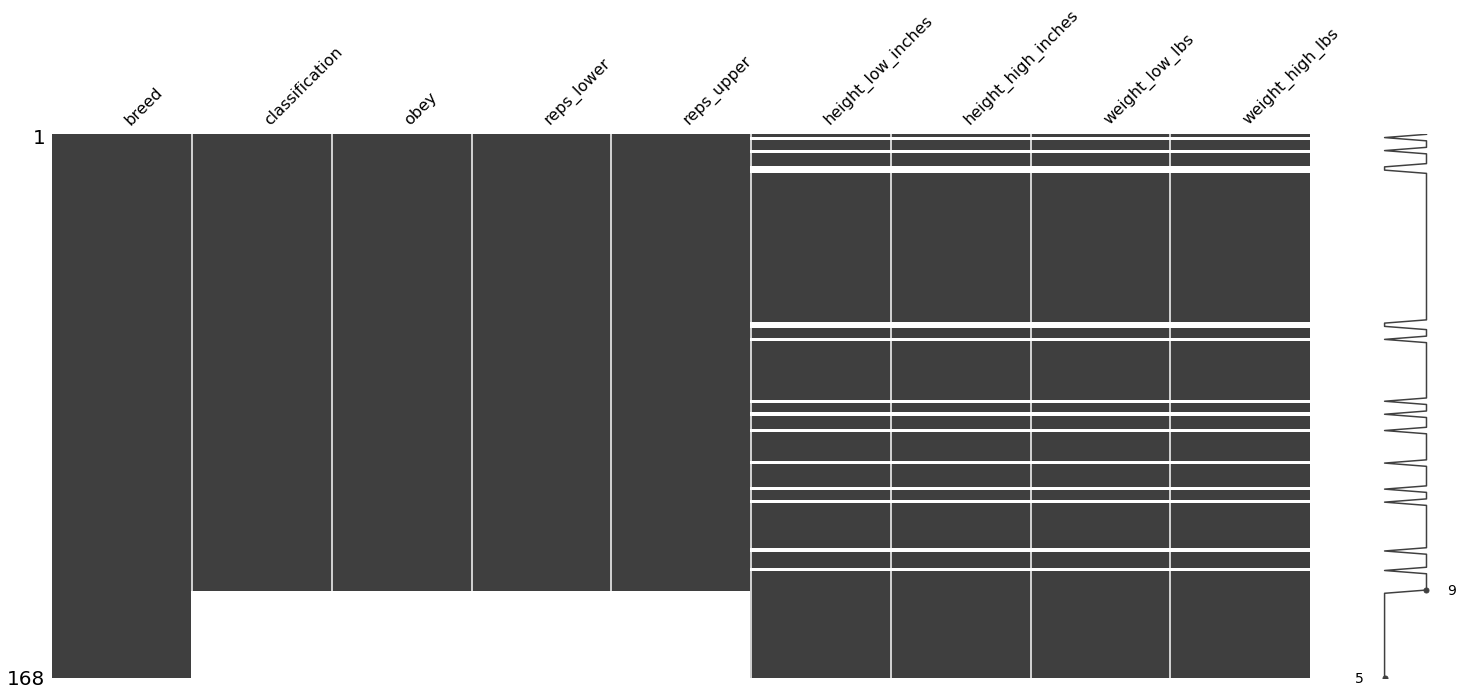

In [15]:
mn.matrix(breeds)

In [16]:
breeds.head(2)

,breed,classification,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
0,border collie,brightest dogs,0.95,1.0,4.0,19.0,21.0,40.0,40.0
1,poodle,brightest dogs,0.95,1.0,4.0,NaN,NaN,NaN,NaN


Aggregate missing dog stats

In [17]:
mix = []                                                                        # storage
for c in breeds.drop(columns=['breed', 'classification']).columns:
    mix.append(breeds[c].mean())                                                # get mean stat
mix = zip(breeds.drop(columns=['breed', 'classification']).columns, mix)        # convert to df
mix = pd.DataFrame(mix).T
mix.columns = mix.iloc[0]                                                       # rename cols
mix = mix[1:].copy()                                                            # drop row containing column names
mix = mix                                                                       # add col name suffix
mix                                                                             # inspect

,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
1,0.569858,25.319149,41.028369,17.941176,20.908497,42.934641,57.522876


In [18]:
mix = mix.squeeze()

Fill missing dog characteristics with aggregate value

In [19]:
for i, col in enumerate(breeds.columns[2:]):
    breeds[col].fillna(mix[i], inplace=True)

In [20]:
breeds.head(2)

,breed,classification,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
0,border collie,brightest dogs,0.95,1.0,4.0,19.000000,21.000000,40.000000,40.000000
1,poodle,brightest dogs,0.95,1.0,4.0,17.941176,20.908497,42.934641,57.522876


# Export Data

In [21]:
breeds.to_csv('./datasets/working_data/breeds_info.csv', index=False)

[Run Next](https://github.com/gwoodstock/project4/blob/main/scrapers/breeds_scrape.ipynb): Breeds Scraper\
\
***Collects breed data from [DogBreedInfo.com](https://www.dogbreedinfo.com/hybriddogs.htm)***